# Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
pd.set_option("display.max_colwidth", -1)
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#seeding
seed = 2021
np.random.seed = seed
tf.seed = seed

In [3]:
#Creating these two folder
!mkdir train test

# Data

In [4]:
#Unziping the training and testing folders into directories
print('Unzipping stage1_train.zip')
!unzip -q "../input/data-science-bowl-2018/stage1_train.zip" -d train/
print('Unzipped stage1_train.zip')

print('Unzipping stage1_test.zip')
!unzip -q "../input/data-science-bowl-2018/stage1_test.zip" -d test/
print('Unzipped stage1_test.zip')

Unzipping stage1_train.zip
Unzipped stage1_train.zip
Unzipping stage1_test.zip
Unzipped stage1_test.zip


In [5]:
# Root directories for training and testing
TRAIN_ROOT = './train'
TEST_ROOT = './test'

In [6]:
# Function to create a dataframe of files which will be used for further processing
def files_df(root_dir):
    subdir = os.listdir(root_dir)
    files = []
    df = pd.DataFrame()
    for dir in subdir:
        files.append(os.path.join(root_dir,dir))
    df['files'] = files
    return df

In [7]:
train_df = files_df(TRAIN_ROOT)
test_df = files_df(TEST_ROOT)

In [8]:
# Hyperparameters
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3
CLASSES = 1
BATCH_SIZE = 8

In [9]:
# Function which will create a dataframe of image paths and mask paths along with creating a single mask with multiple masks
def image_df(filenames):
    image_paths = []
    mask_paths = []
    df = pd.DataFrame()
    for filename in tqdm(filenames):
        file_path = os.path.join(filename,'images')
        image_path = os.path.join(file_path,os.listdir(file_path)[0])
        image_paths.append(image_path)
        
        mask = np.zeros((IMG_WIDTH,IMG_HEIGHT,1))
        mask_dir = file_path.replace("images", "masks")
        masks = os.listdir(mask_dir)
        for m in masks:
            mask_path = os.path.join(mask_dir,m)
            mask_  = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
            mask_  = cv2.resize(mask_,(IMG_WIDTH,IMG_HEIGHT),interpolation=cv2.INTER_NEAREST)
            mask_  = np.expand_dims(mask_, axis = -1)
            mask = np.maximum(mask,mask_)
        newmask_dir = mask_dir.replace("masks", "masks_")
        if not os.path.isdir(newmask_dir):
            os.mkdir(newmask_dir)
        newmask_path = image_path.replace("images", "masks_")
        mask_paths.append(newmask_path)
        cv2.imwrite(newmask_path, mask)
    df['images'] = image_paths
    df['masks'] = mask_paths
    return df

In [10]:
# Training dataframe
train_filenames = train_df['files']
train = image_df(train_filenames)

100%|██████████| 670/670 [00:24<00:00, 27.62it/s]


# Train Test Split

In [11]:
X_train, X_val = train_test_split(train, test_size=0.1, random_state=42)

In [12]:
X_train.head()

,images,masks
300,./train/df9a4212ecb67bb4e58eba62f293b91f9d6f1dde73e38fa891c75661d419fc97/images/df9a4212ecb67bb4e58eba62f293b91f9d6f1dde73e38fa891c75661d419fc97.png,./train/df9a4212ecb67bb4e58eba62f293b91f9d6f1dde73e38fa891c75661d419fc97/masks_/df9a4212ecb67bb4e58eba62f293b91f9d6f1dde73e38fa891c75661d419fc97.png
60,./train/be1916d0e5592c17f971315b5de720ef6894173087399daed94a52ef109c1572/images/be1916d0e5592c17f971315b5de720ef6894173087399daed94a52ef109c1572.png,./train/be1916d0e5592c17f971315b5de720ef6894173087399daed94a52ef109c1572/masks_/be1916d0e5592c17f971315b5de720ef6894173087399daed94a52ef109c1572.png
133,./train/3477024fd843e46097840360f9cdee24b76bf5c593ed27a9aee7a5728a06aa51/images/3477024fd843e46097840360f9cdee24b76bf5c593ed27a9aee7a5728a06aa51.png,./train/3477024fd843e46097840360f9cdee24b76bf5c593ed27a9aee7a5728a06aa51/masks_/3477024fd843e46097840360f9cdee24b76bf5c593ed27a9aee7a5728a06aa51.png
30,./train/1609b1b8480ee52652a644403b3f7d5511410a016750aa3b9a4c8ddb3e893e8e/images/1609b1b8480ee52652a644403b3f7d5511410a016750aa3b9a4c8ddb3e893e8e.png,./train/1609b1b8480ee52652a644403b3f7d5511410a016750aa3b9a4c8ddb3e893e8e/masks_/1609b1b8480ee52652a644403b3f7d5511410a016750aa3b9a4c8ddb3e893e8e.png
69,./train/648636ee314d7bdba3ab2fc0fe49a863de35c3e2caf619039f678df67b526868/images/648636ee314d7bdba3ab2fc0fe49a863de35c3e2caf619039f678df67b526868.png,./train/648636ee314d7bdba3ab2fc0fe49a863de35c3e2caf619039f678df67b526868/masks_/648636ee314d7bdba3ab2fc0fe49a863de35c3e2caf619039f678df67b526868.png


In [13]:
X_val.head()

,images,masks
361,./train/bf566e75d5cb0196de4139573f8bbbda0fa38d5048edf7267fe8793dcc094a66/images/bf566e75d5cb0196de4139573f8bbbda0fa38d5048edf7267fe8793dcc094a66.png,./train/bf566e75d5cb0196de4139573f8bbbda0fa38d5048edf7267fe8793dcc094a66/masks_/bf566e75d5cb0196de4139573f8bbbda0fa38d5048edf7267fe8793dcc094a66.png
158,./train/cdab367b30db47061df837c1ae9fa875d6057614f797332d37d3513517d6c694/images/cdab367b30db47061df837c1ae9fa875d6057614f797332d37d3513517d6c694.png,./train/cdab367b30db47061df837c1ae9fa875d6057614f797332d37d3513517d6c694/masks_/cdab367b30db47061df837c1ae9fa875d6057614f797332d37d3513517d6c694.png
480,./train/1023509cf8d4c155467800f89508690be9513431992f470594281cd37dbd020d/images/1023509cf8d4c155467800f89508690be9513431992f470594281cd37dbd020d.png,./train/1023509cf8d4c155467800f89508690be9513431992f470594281cd37dbd020d/masks_/1023509cf8d4c155467800f89508690be9513431992f470594281cd37dbd020d.png
640,./train/b2c23ddb04531158da6a0abcaca78fec0ae5c6f64f60166e4f36f4a161efd76f/images/b2c23ddb04531158da6a0abcaca78fec0ae5c6f64f60166e4f36f4a161efd76f.png,./train/b2c23ddb04531158da6a0abcaca78fec0ae5c6f64f60166e4f36f4a161efd76f/masks_/b2c23ddb04531158da6a0abcaca78fec0ae5c6f64f60166e4f36f4a161efd76f.png
275,./train/a22b7882fa85b9f0fcef659a7b82bfcddf01710f9a7617a9e036e84ac6901841/images/a22b7882fa85b9f0fcef659a7b82bfcddf01710f9a7617a9e036e84ac6901841.png,./train/a22b7882fa85b9f0fcef659a7b82bfcddf01710f9a7617a9e036e84ac6901841/masks_/a22b7882fa85b9f0fcef659a7b82bfcddf01710f9a7617a9e036e84ac6901841.png


# Data Preprocessing

In [14]:
# Function to parse image and mask file path and convert them into image and mask
def parse_function(image_path, mask_path):
    image_string = tf.io.read_file(image_path)
    image = tf.image.decode_png(image_string, channels=IMG_CHANNELS)#
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH]) # height x width
    
    mask_string = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask_string, channels=IMG_CHANNELS)#
    mask = tf.image.convert_image_dtype(mask, tf.float32)
    mask = tf.image.resize(mask, [IMG_HEIGHT, IMG_WIDTH])                      
    return image, mask

In [15]:
# Function to perform data augmentation
def train_preprocess(image, mask):
    a = tf.random.uniform(())
    if a<0.2:
        image = tf.image.random_flip_left_right(image)
        mask = tf.image.random_flip_left_right(mask)
    elif a<0.4:
        image = tf.image.random_brightness(image, max_delta=32.0 / 255.0)
        mask = tf.image.random_brightness(mask, max_delta=32.0 / 255.0)
    elif a<0.6:
        image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        mask = tf.image.random_saturation(mask, lower=0.5, upper=1.5)
    elif a<0.8:
        image = tf.image.random_flip_up_down(image)
        mask = tf.image.random_flip_up_down(mask)
    else:
        image = tf.image.random_hue(image, 0.2)
        mask = tf.image.random_hue(mask, 0.2)
    
    image = tf.clip_by_value(image, 0.0, 1.0)
    mask = tf.clip_by_value(mask, 0.0, 1.0)
    return image, mask

In [16]:
# Training dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train['images'], X_train['masks']))
train_ds = train_ds.shuffle(X_train.shape[0])
train_ds = train_ds.map(parse_function, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(train_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.batch(BATCH_SIZE)
train_ds = train_ds.prefetch(1)

In [17]:
# Validation dataset
val_ds = tf.data.Dataset.from_tensor_slices((X_val['images'], X_val['masks']))
val_ds = val_ds.shuffle(X_val.shape[0])
val_ds = val_ds.map(parse_function, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(BATCH_SIZE)
val_ds = val_ds.prefetch(1)

# Sample of Train and Validation datasets

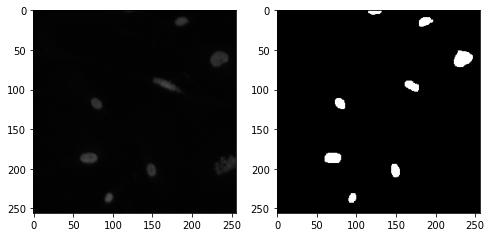

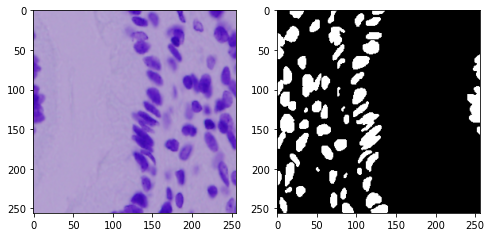

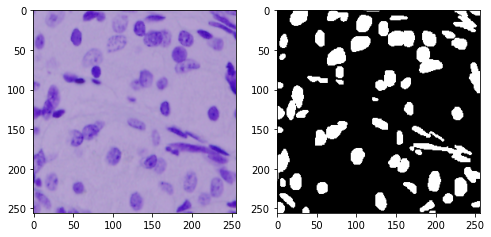

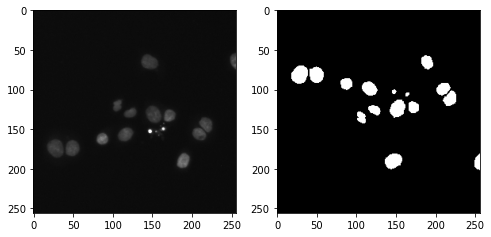

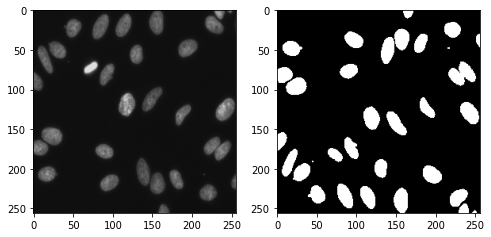

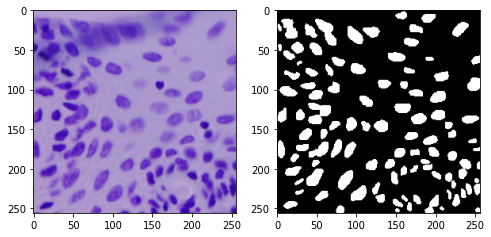

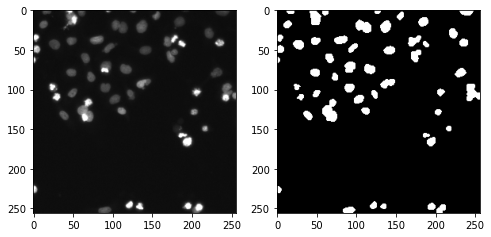

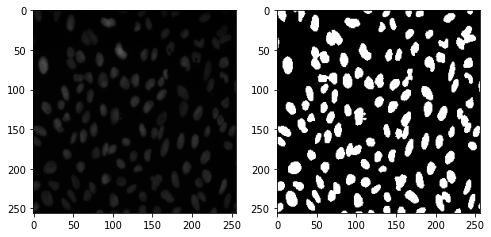

In [18]:
# Sample of training dataset
for image, mask in train_ds.take(1):
    for i in range(BATCH_SIZE):
        plt.figure(figsize=(8,4))
        plt.subplot(121)
        plt.imshow(image[i])
        plt.subplot(122)
        plt.imshow(mask[i], cmap = 'gray')
        plt.show()

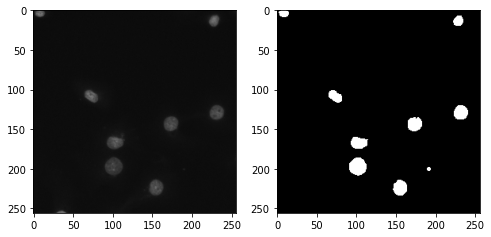

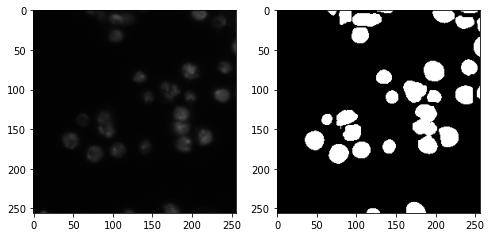

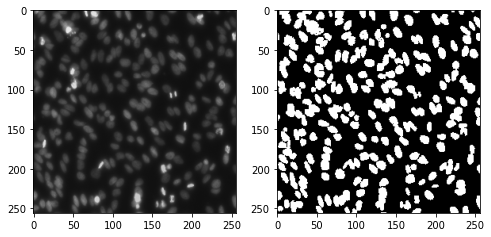

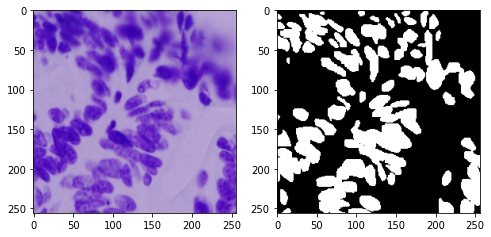

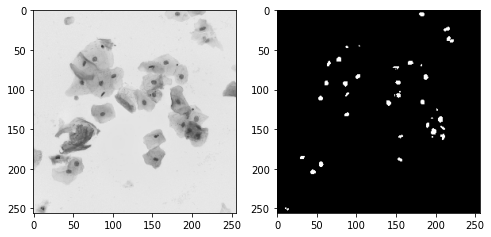

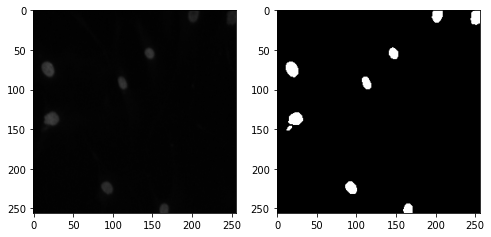

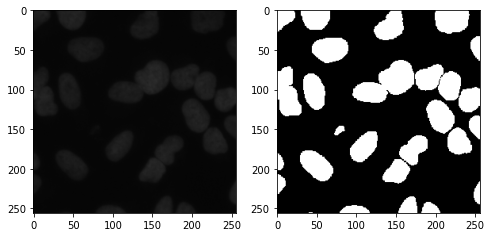

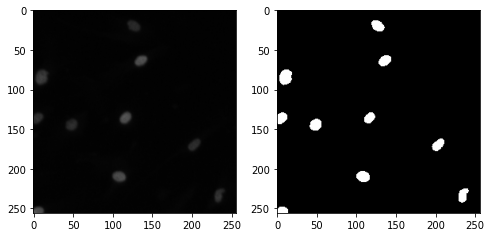

In [19]:
# Sample of validation dataset
for image, mask in val_ds.take(1):
    for i in range(BATCH_SIZE):
        plt.figure(figsize=(8,4))
        plt.subplot(121)
        plt.imshow(image[i])
        plt.subplot(122)
        plt.imshow(mask[i], cmap = 'gray')
        plt.show()